<a href="https://colab.research.google.com/github/je-blueink/Basics-for-statistics/blob/main/python_and_r/exercises_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3장 1.
- 3개의 열을 갖는 데이터프레임 만들기 (name, height, weight)
- 첫 번째 사람 kim의 키와 몸무게 두 값만 배열로 추출

In [ ]:
x1 <- c("kim", "lee", "park")
x2 <- c(170, 160, 180)
x3 <- c(60, 55, 75)

In [ ]:
df1 <- data.frame(name=x1, height=x2, weight=x3, stringsAsFactors = T)
df1

name,height,weight
<fct>,<dbl>,<dbl>
kim,170,60
lee,160,55
park,180,75


In [ ]:
arr1 <- array(df1[1,-1])
arr1

[[1]]
[1] 170

[[2]]
[1] 60

4장 8.
- 함수 mywage 작성 (주당 근무시간 40시간 이내: 시간당 임금 1만원 / 40시간 초과분에 대해 1.5배 지급)
- 출력은 list 함수 사용

In [ ]:
mywage <- function(time){
 options(scipen = 100)
  if (time>40){
    wage <- (40+(time-40)*1.5)*10000
  } else if(time>0 & time<=40){
    wage <- time*10000
  } else {
    wage <- 0
  }
   list(근무시간 = time, 임금 = wage)
}

In [ ]:
mywage(67)

$근무시간
[1] 67

$임금
[1] 805000

In [ ]:
mywage(30)

$근무시간
[1] 30

$임금
[1] 300000

8장 2.
1985년 USDA 여성 영양 관련 자료 (25~50세, 랜덤표본 737명)

(1) 결측치는 0으로 표시되어 있다.
- 결측치를 제거하는 명령
- 변수별 결측치 개수 확인

In [ ]:
# 데이터 입력 및 확인
data1 <- read.csv('sample_data/nutrient2.csv')
head(data1)

,id,calcium,iron,protein,vitaminA,vitaminC
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,522.29,10.188,42.561,349.13,54.141
2,2,343.32,4.113,67.793,266.99,24.839
3,3,858.26,13.741,59.933,667.90,155.455
4,4,575.98,13.245,42.215,0.00,224.688
5,5,1927.50,18.919,111.316,740.27,80.961
6,6,607.58,6.800,45.785,165.68,13.050


In [ ]:
# 변수별 결측치 개수 확인
data1[data1==0] <- NA
colSums(is.na(data1))

id  calcium     iron  protein vitaminA vitaminC 
       0        4        2        1        9        7

In [ ]:
# 결측치 제거 및 확인
data_omit <- na.omit(data1)
colSums(is.na(data_omit))

id  calcium     iron  protein vitaminA vitaminC 
       0        0        0        0        0        0

(2) 변수별 평균, 표준편차, 최솟값, 최댓값, 중앙값, 제1사분위수, 제3사분위수

In [ ]:
# 변수별 다섯수치요약 구하기
summary(data1[-1])

    calcium             iron           protein           vitaminA       
 Min.   :   7.44   Min.   : 0.367   Min.   :  2.255   Min.   :    2.27  
 1st Qu.: 325.95   1st Qu.: 7.468   1st Qu.: 45.523   1st Qu.:  276.61  
 Median : 547.43   Median :10.033   Median : 61.239   Median :  523.18  
 Mean   : 620.76   Mean   :11.134   Mean   : 65.893   Mean   :  835.95  
 3rd Qu.: 822.57   3rd Qu.:13.689   3rd Qu.: 80.806   3rd Qu.:  938.90  
 Max.   :2866.44   Max.   :58.668   Max.   :251.012   Max.   :34434.27  
 NA's   :4         NA's   :2        NA's   :1         NA's   :9         
    vitaminC      
 Min.   :  0.037  
 1st Qu.: 25.624  
 Median : 53.681  
 Mean   : 78.810  
 3rd Qu.:108.626  
 Max.   :414.802  
 NA's   :7        

In [ ]:
# 변수별 표준편차 구하기
sapply(data1[-1], sd, na.rm=TRUE)

calcium        iron     protein    vitaminA    vitaminC 
 394.939556    5.970502   30.499992 1637.222928   72.422305

(3) 변수별 상자그림 및 히스토그램 그리기 + 각 변수의 분포 설명

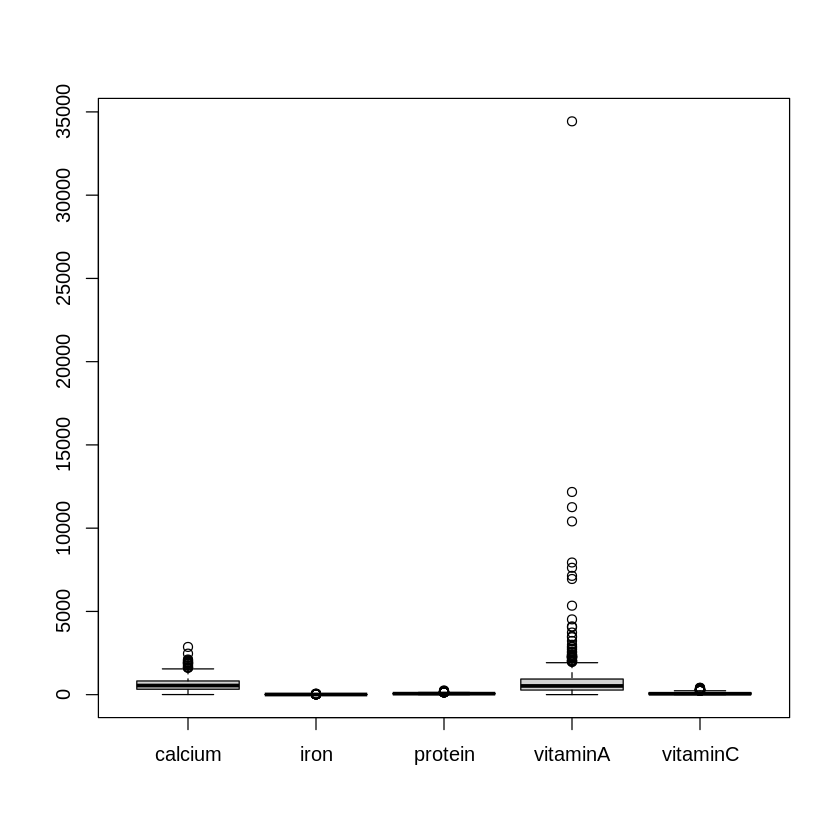

In [ ]:
# 변수 별 상자그림 그리기
boxplot(data1[-1])

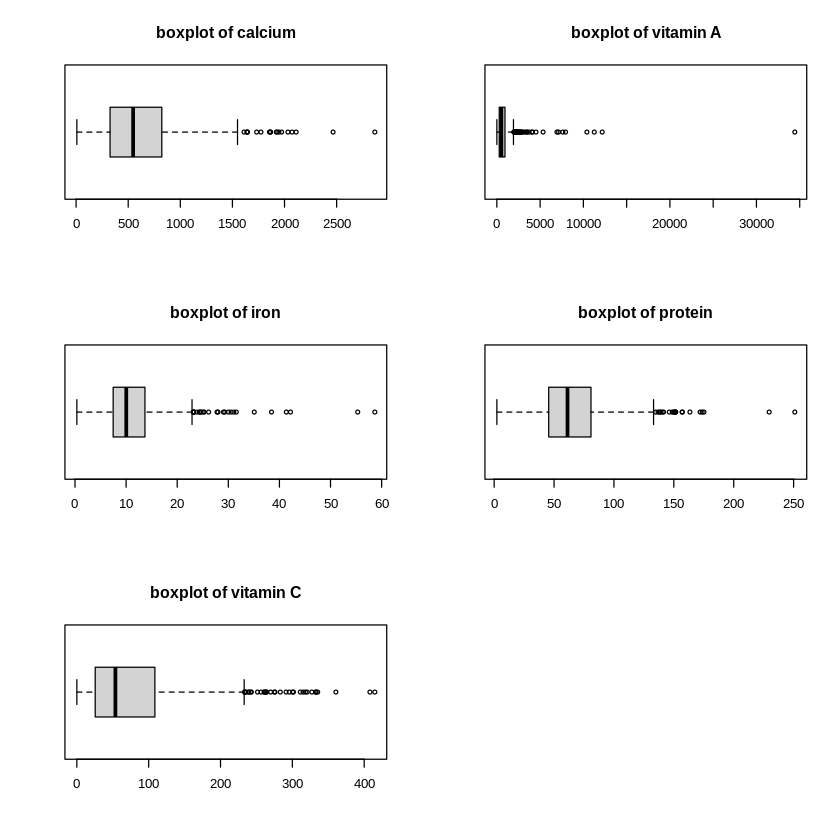

In [ ]:
# vitamin A 에 이상치가 있고, 변수별 데이터의 평균과 산포도 차이가 크기 때문에, 분포를 좀 더 확인하기 쉽도록 각각 상자그림을 그림
par(mfrow = c(3,2))
boxplot(data1$calcium, horizontal = TRUE);title("boxplot of calcium");
boxplot(data1$vitaminA, horizontal = TRUE);title("boxplot of vitamin A");
boxplot(data1$iron, horizontal = TRUE);title("boxplot of iron");
boxplot(data1$protein, horizontal = TRUE);title("boxplot of protein");
boxplot(data1$vitaminC, horizontal = TRUE);title("boxplot of vitamin C");

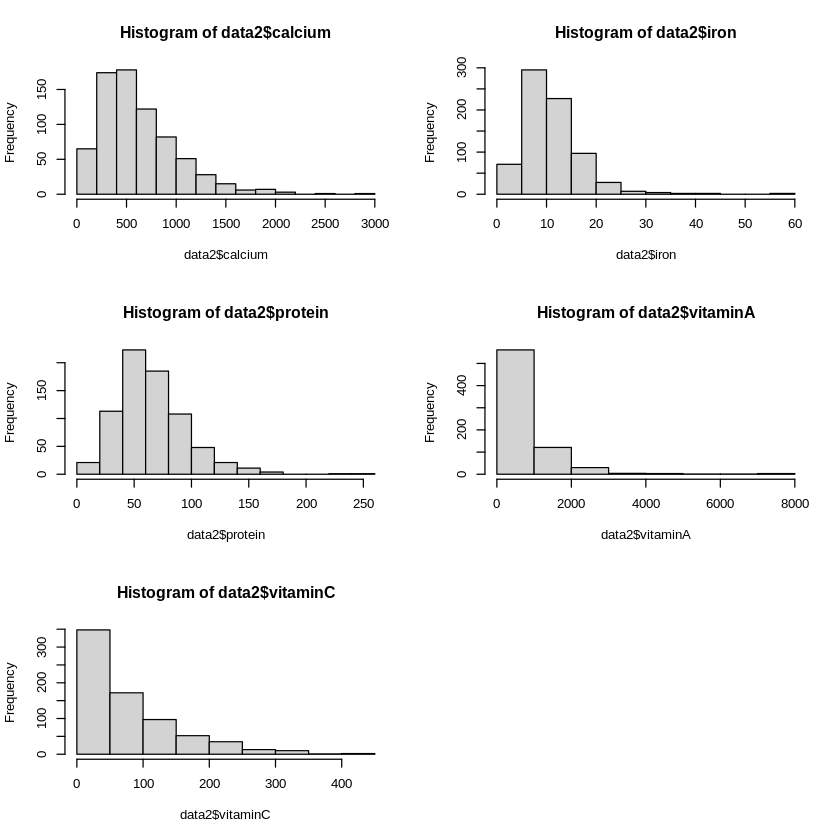

In [ ]:
# 변수 별 히스토그램 그리기
par(mfrow=c(3, 2))
hist(data2$calcium); hist(data2$iron); hist(data2$protein); hist(data2$vitaminA); hist(data2$vitaminC)